# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
print(len(merge_df["Mouse ID"].unique()))

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_duplicate = merge_df.duplicated(subset = ["Mouse ID", "Timepoint"])
find_duplicate

duplicate_entries = find_duplicate[find_duplicate].index
duplicate_entries

duplicate_entries_list = list(duplicate_entries)
duplicate_entries_list

for number in duplicate_entries_list:
    print(merge_df.loc[[number], ["Mouse ID"]])


    Mouse ID
137     g989
    Mouse ID
360     g989
    Mouse ID
681     g989
    Mouse ID
869     g989
     Mouse ID
1111     g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merge_df.loc[(merge_df["Mouse ID"] == "g989"), :]
duplicate_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
reduced_df = merge_df.loc[(merge_df["Mouse ID"] != "g989"), :]
reduced_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(reduced_df["Mouse ID"].unique()))


248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by Drug Regimen with each summary statistic function
mean_tumor_volume = reduced_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = reduced_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = reduced_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = reduced_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_std_err = reduced_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Combine each summary statistic into one data frame
drug_summary_table = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                                      "Median Tumor Volume": median_tumor_volume,
                                      "Tumor Volume Variance": tumor_volume_variance,
                                      "Tumor Volume Std. Dev.": tumor_volume_std_dev,
                                      "Tumor Volume Std. Err.": tumor_volume_std_err})


drug_summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = reduced_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

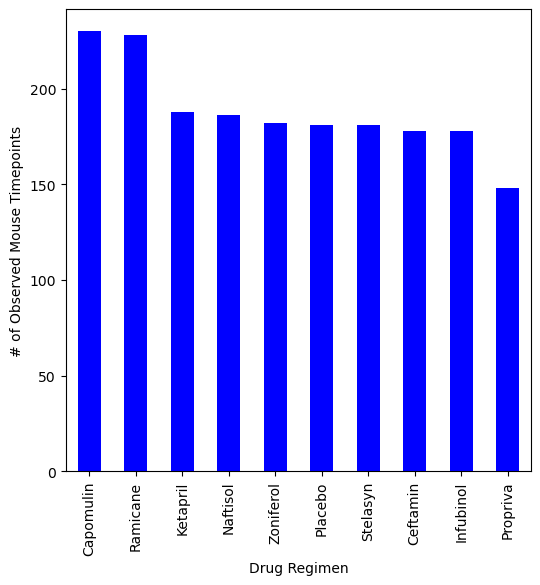

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_bar_chart = reduced_df.groupby("Drug Regimen")["Timepoint"].size()
drug_regimen_bar_chart_sorted = drug_regimen_bar_chart.sort_values(ascending = False)
drug_regimen_bar_chart_sorted

figure1 = drug_regimen_bar_chart_sorted.plot(kind = "bar", facecolor = "blue", figsize=(6,6),
                                                xlabel="Drug Regimen",
                                                ylabel="# of Observed Mouse Timepoints")

xticklabels = drug_regimen_bar_chart_sorted.index

plt.show()


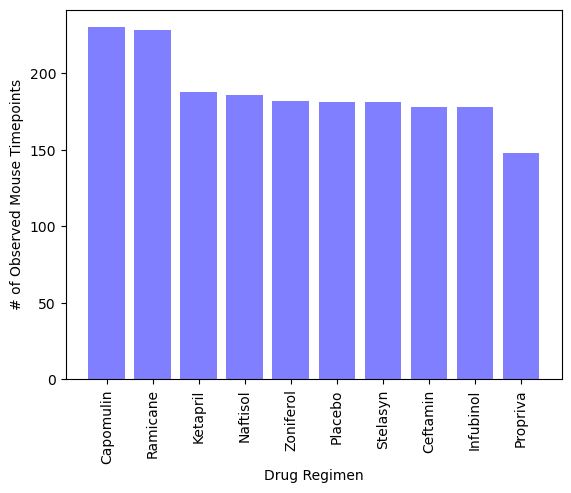

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(drug_regimen_bar_chart_sorted))
tick_locations = [value+0.4 for value in x_axis]

#Set up and show bar chart
plt.bar(x_axis, drug_regimen_bar_chart_sorted, color = 'blue', alpha=0.5, align="edge")
plt.xticks(tick_locations, drug_regimen_bar_chart_sorted.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


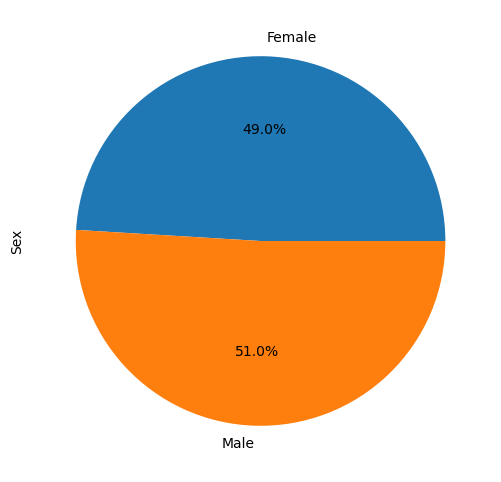

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_pie_chart = reduced_df.groupby("Sex").size()

labels = sex_pie_chart.index

figure2 = sex_pie_chart.plot(kind = "pie", figsize=(6,6),
                                y =  sex_pie_chart.index,
                                ylabel = "Sex",
                                autopct="%1.1f%%")

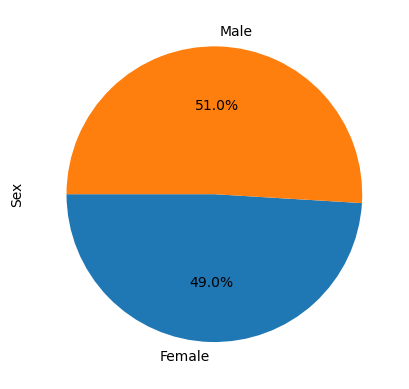

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_pie_chart, labels = labels, autopct="%1.1f%%", startangle = 180)

plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = reduced_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
last_timepoint_df


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_merge_df = pd.merge(last_timepoint_df, reduced_df, on = ["Mouse ID", "Timepoint"], how = "left")
last_timepoint_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    last_timepoint_merge_df.loc[(last_timepoint_merge_df["Drug Regimen"] == treatment), ["Tumor Volume (mm3)"]]
    
    # add subset 
    
    tumor_vol_data.append(last_timepoint_merge_df.loc[(last_timepoint_merge_df["Drug Regimen"] == treatment), ["Tumor Volume (mm3)"]]["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    
    volume_df = last_timepoint_merge_df.loc[(last_timepoint_merge_df["Drug Regimen"] == treatment), "Tumor Volume (mm3)"]
    quartiles = volume_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = volume_df.loc[(volume_df < lower_bound) | (volume_df > upper_bound)]
    
    if len(outliers) > 0:
        print(f"{treatment}'s potential outliers: {outliers}")
    else:
        print(f"{treatment} has no outliers")


Capomulin has no outliers
Ramicane has no outliers
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin has no outliers


C:\Users\vasqu\AppData\Local\Temp\ipykernel_5340\1140097728.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


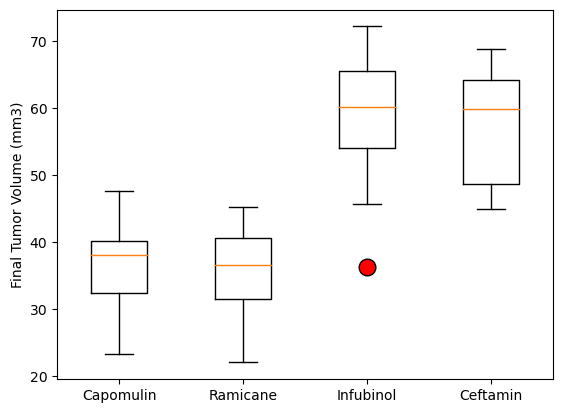

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
flierprops = dict(marker = "o", markerfacecolor = "r", markersize = 12)
ax1.boxplot(tumor_vol_data, flierprops = flierprops)
plt.show()


## Line and Scatter Plots

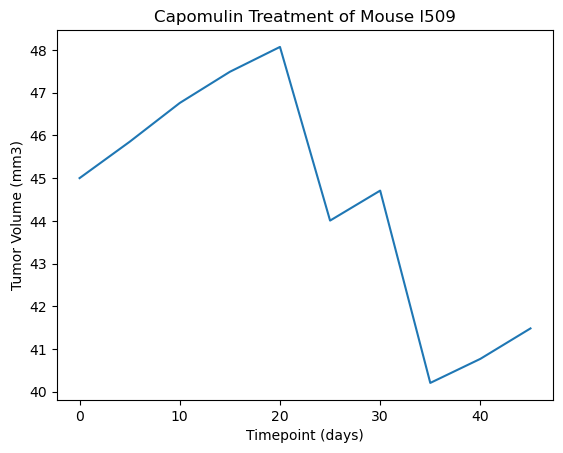

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

single_mouse_line_graph = reduced_df.loc[(reduced_df["Mouse ID"] == "l509"), ["Timepoint", "Tumor Volume (mm3)"]]
single_mouse_line_graph

single_mouse_index_labels = single_mouse_line_graph["Timepoint"]
single_mouse_line_graph.index = single_mouse_index_labels
single_mouse_line_graph_new = single_mouse_line_graph.drop(["Timepoint"], axis = 1)
single_mouse_line_graph_new

single_mouse_list = list(single_mouse_line_graph_new.index)
single_mouse_list

plt.plot(single_mouse_list, single_mouse_line_graph_new)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

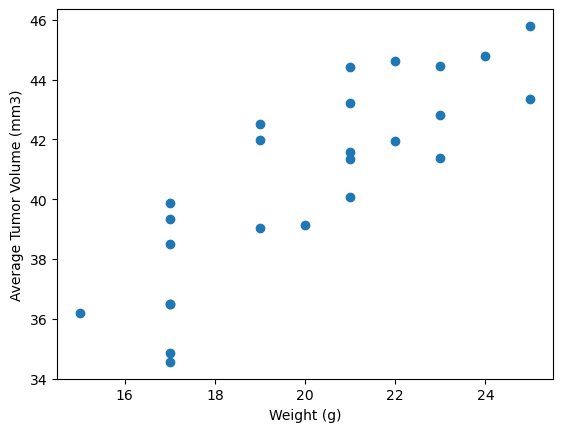

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_only_mice = reduced_df.loc[(reduced_df["Drug Regimen"] == "Capomulin"), :]
capomulin_only_mice

capomulin_only_mice_tumor = capomulin_only_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_only_mice_tumor

capomulin_only_mice_weights = capomulin_only_mice.groupby("Mouse ID")["Weight (g)"].mean()
capomulin_only_mice_weights

weight_tumor_merge = pd.merge(capomulin_only_mice_tumor, capomulin_only_mice_weights, on = "Mouse ID", how = "inner")
weight_tumor_merge

plt.scatter(weight_tumor_merge["Weight (g)"], weight_tumor_merge["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


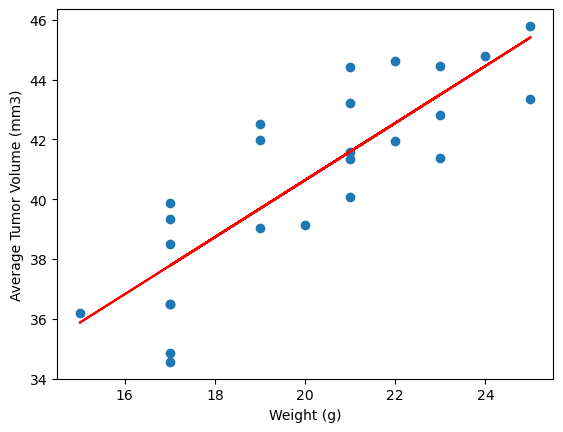

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight_tumor_merge["Weight (g)"], weight_tumor_merge["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.scatter(weight_tumor_merge["Weight (g)"], weight_tumor_merge["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_tumor_merge["Weight (g)"], weight_tumor_merge["Tumor Volume (mm3)"])
regress_values = weight_tumor_merge["Weight (g)"] * slope + intercept
plt.plot(weight_tumor_merge["Weight (g)"],regress_values,"r-")
plt.show()

In [19]:
tumor_vol_data

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973